In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

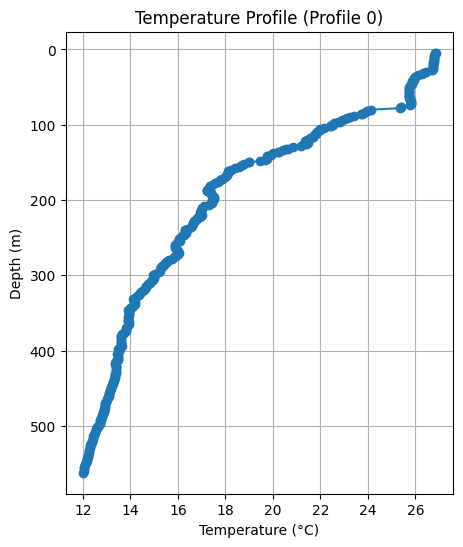

In [2]:
df = pd.read_csv("bgc_sample_cleaned.csv")

#Temperature vs Depth
profile_id = df["profile"].unique()[0]
profile_data = df[df["profile"] == profile_id]

plt.figure(figsize=(5,6))
plt.plot(profile_data["temp"], profile_data["depth"], marker="o")
plt.gca().invert_yaxis()
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title(f"Temperature Profile (Profile {profile_id})")
plt.grid()
plt.show()

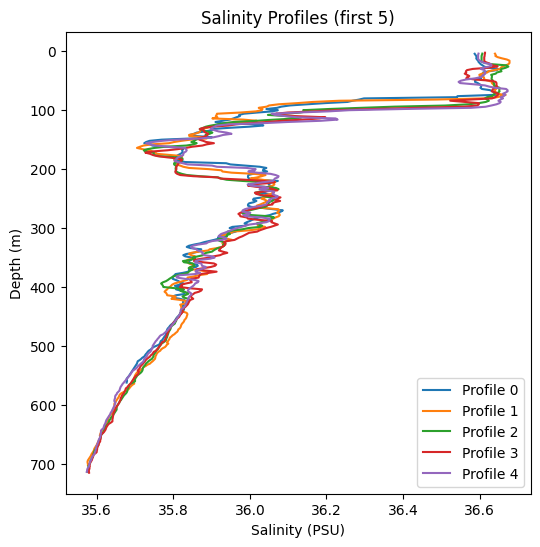

In [3]:
#salinity vs depth
plt.figure(figsize=(6,6))
for pid in df["profile"].unique()[:5]: 
    p_data = df[df["profile"] == pid]
    plt.plot(p_data["salinity"], p_data["depth"], label=f"Profile {pid}")

plt.gca().invert_yaxis()
plt.xlabel("Salinity (PSU)")
plt.ylabel("Depth (m)")
plt.title("Salinity Profiles (first 5)")
plt.legend()
plt.show()

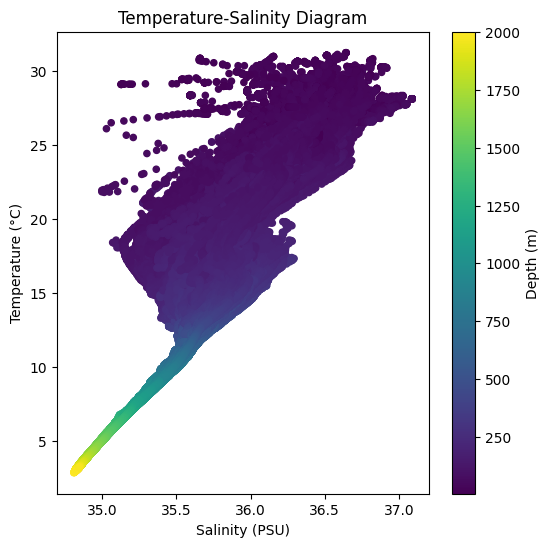

In [5]:
#Temperature-salinity...TS diagram
plt.figure(figsize=(6,6))
sc = plt.scatter(
    df["salinity"], 
    df["temp"], 
    c=df["depth"], 
    cmap="viridis", 
    s=20)
plt.xlabel("Salinity (PSU)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature-Salinity Diagram")
cbar = plt.colorbar(sc)
cbar.set_label("Depth (m)")

plt.show()

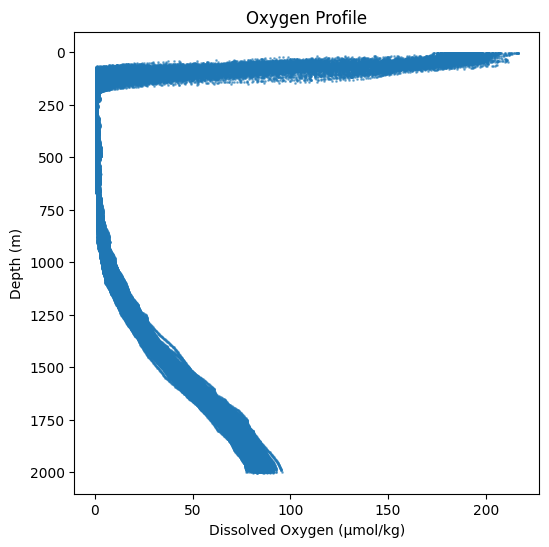

In [9]:
#Oxygen vs Depth
plt.figure(figsize=(6,6))
plt.plot(df["oxygen"], df["depth"], '.', markersize=2, alpha=0.5)  # scatter-like
plt.gca().invert_yaxis()
plt.xlabel("Dissolved Oxygen (µmol/kg)")
plt.ylabel("Depth (m)")
plt.title("Oxygen Profile")
plt.show()

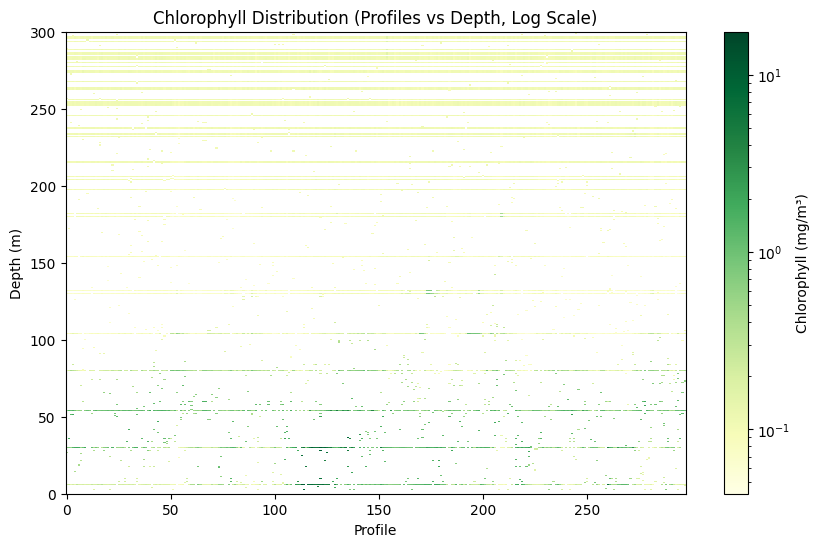

In [18]:
#Chlorophyll vs Depth
import numpy as np
import matplotlib.colors as colors

chl_pivot = df.pivot_table(index="depth", columns="profile", values="chlorophyll", aggfunc="mean")

chl_values = chl_pivot.values
chl_values[chl_values <= 0] = np.nan

plt.figure(figsize=(10,6))
mesh = plt.pcolormesh(
    chl_pivot.columns, 
    chl_pivot.index, 
    chl_values,
    cmap="YlGn",
    norm=colors.LogNorm(vmin=np.nanmin(chl_values), vmax=np.nanmax(chl_values)),
    shading="auto"
)

plt.colorbar(mesh, label="Chlorophyll (mg/m³)")
plt.gca().invert_yaxis()
plt.ylim(0, 300) 
plt.xlabel("Profile")
plt.ylabel("Depth (m)")
plt.title("Chlorophyll Distribution (Profiles vs Depth, Log Scale)")
plt.show()
